# Polynomial Regression 

## Why Polynomial Regression?


* Can handle non linear relationships
<br>
If you have a non linear relationships in you dataset(ex. $x^2$,$sin$... ),linear model cant handle this relationships
<br>
<br>

* Taylor Series
<br>
Let's assume that we have some real function(infinitely differentiable) $f->X:Y$.
Then



![title](../Images/Taylor.svg?sanitize=true)


This infinity series is good aproximation for our $f$  

## Deffinations

Given a $n\times p$ and $n\times1$ matrices. Let's denote them X and Y respectively.
 

![title](../Images/X.svg?sanitize=true)

![title](../Images/Y.svg?sanitize=true)

### 1-D case
<br>

#### m-th degree polynomial model 

### <center>$f(x_{i}):=\hat{y}_i=\beta_{0} + x_{i}\beta_{1} + x_{i}^{2}\beta_{2}+ ... + x_{i}^{m}\beta_{m}$<center>
    
<center>$\hat{Y}=X_{f}\beta$<center>
<br>
    
$$
X_{f} = \begin{bmatrix}
 X & X^{2} & \cdots & X^{m}
 \end{bmatrix}
$$

$$
\beta = \begin{bmatrix}
 \beta_{0} & \beta_{1} & \cdots & \beta_{m}
 \end{bmatrix}^{T}
$$

###### So you can compute all powers off $X$ (let's called them polynomial features) and do simple linear regression

### p-dimensional case

In p-dimesnional space for m-th degree polynomial regression. We need to calculate all the monomials off degree at most m.
<br>
Example in 2-d case.

<center>$f(x,y):=\hat{y}_i=\beta_{0} + x\beta_{1} +y\beta_{2}+ xy\beta_{2}+ x^{2}\beta_{4}+y^{2}\beta_{5}$<center>






#### We can calculate polynomial features using this code 



In [1]:
from sklearn.preprocessing import PolynomialFeatures
from numpy.random import randn
x = randn(10,2)
poly_features = PolynomialFeatures(degree=2).fit_transform(x)
poly_features.shape

(10, 6)

## Let's generate a dataset and look at the Polynomial regression in action

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

#Need to add path in sys.path for import functions from another directory
import sys
sys.path.insert(1,"../")
from Utils import PolynomialRegression,plot_polinomial_regression,plot_degree_vs_loss


## Generate Non-linear dataset

In [3]:
#setup h_params
SEED = 42
X_MIN = 0
X_MAX = 2
N = 30
MEAN = 0
STD = 1

#setup random seed
np.random.seed(SEED)

#generate dataset
X = np.linspace(X_MIN, X_MAX, N)
Y_line = X**2
Y = Y_line + np.random.normal(MEAN,STD,N)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


### Split it into train, test and plot it

![title](../Images/train_etst.png)

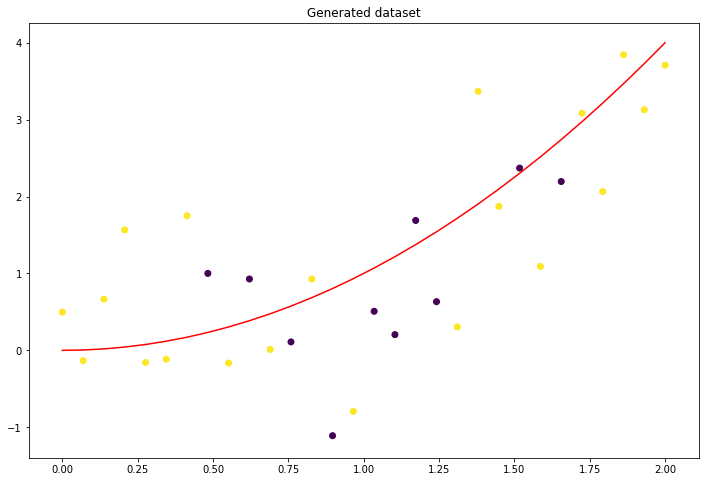

In [4]:

#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=58)

#plot dataset
fig = plt.figure(figsize=(12,8))
plt.plot(X,Y_line,"r")
X = np.concatenate((X_train,X_test),axis=0)
Y = np.concatenate((y_train,y_test),axis=0)
train_test_ind = np.array([1 if i < X_train.shape[0] else 0 for i in range(X.shape[0])])
plt.scatter(X.reshape(-1,1), Y.reshape(-1,1),c = train_test_ind.reshape(-1,1)) 
plt.title("Generated dataset");

## Train Polynomial regression in Train and test on Test dataset

Train loss: 0.21344152762473073
Train loss: 11.459358526767296


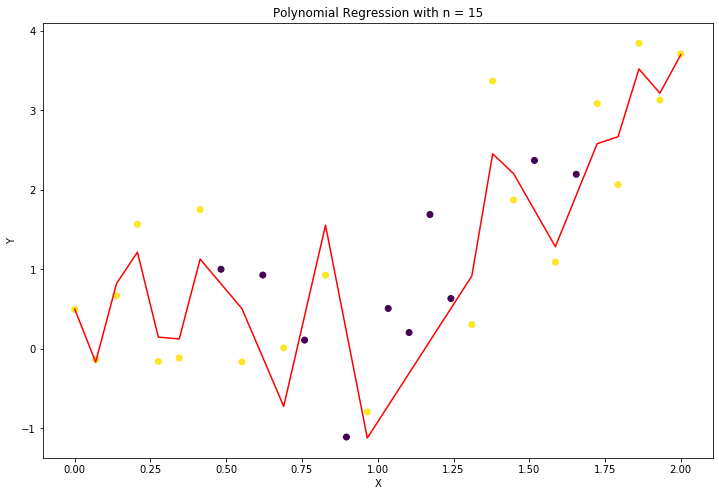

In [5]:
# this function not pushed in git, don't run this cell
plot_polinomial_regression(X_train=X_train,
                           Y_train=y_train,
                           X_test=X_test,
                           Y_test=y_test,
                           n_degree=15)

# Train and test loss with different degrees

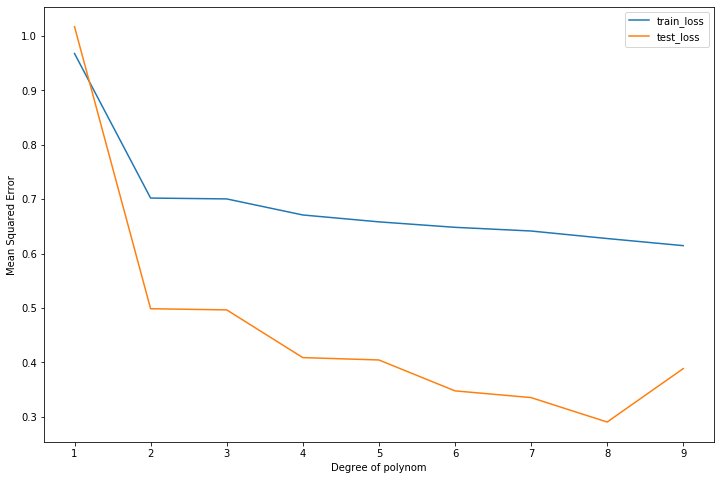

In [6]:
# this function not pushed in git, don't run this cell
plot_degree_vs_loss(X_train = X_train,
               Y_train = y_train,
               X_test = X_test,
               Y_test = y_test,
               range_ = 10)

## This "phenomen" called overfit

![title](../Images/overfit_underfit.png)

## Let's dive deeper

In [7]:
coeffs = []
for i in range(15):  
    poly_reg = PolynomialRegression(n_degree=i)
    poly_reg.fit(X_train,y_train)
    print(poly_reg.coeff())

[[0.]]
[[0.         1.51126769]]
[[ 0.         -1.70009754  1.60607769]]
[[ 0.         -1.18112598  0.93203398  0.22470763]]
[[ 0.          2.81034757 -8.97392136  8.15322628 -1.98603796]]
[[  0.           6.42771573 -23.43244387  28.62838882 -13.82502984
    2.39337264]]
[[  0.           1.20813944   6.92785574 -35.83763767  47.7836597
  -24.69685183   4.4663862 ]]
[[   0.           -3.8739794    48.43767834 -163.52030268  234.64761867
  -164.54254653   56.14785057   -7.47643995]]
[[   0.            5.91252501  -56.38064212  259.65948686 -599.7548009
   725.54899928 -468.77668819  153.56705717  -20.06491851]]
[[    0.            -5.91986923   111.08168216  -628.3812289
   1740.30704568 -2719.51375418  2496.68212789 -1328.3615584
    378.05572312   -44.4577922 ]]
[[     0.            -35.98659801    625.6493228   -3929.89679824
   12451.81120346 -22668.84868563  25115.25372984 -17202.23445415
    7111.26505213  -1625.89890554    157.8828501 ]]
[[ 0.00000000e+00 -3.85780204e+00 -5.76551

## Our regression coefficients unexpectedly big

In [8]:
poly_reg = PolynomialRegression(n_degree=14)
poly_reg.fit(X_train,y_train)
print(poly_reg.coeff())

[[ 0.00000000e+00 -1.71423503e+02  4.57066134e+03 -4.70718813e+04
   2.57045381e+05 -8.48498197e+05  1.81433292e+06 -2.61153512e+06
   2.57725001e+06 -1.74610126e+06  7.97811790e+05 -2.34694794e+05
   4.00519215e+04 -2.98457693e+03 -7.47480578e+00]]


In [9]:
-2.98457693e+03

-2984.57693

# Regularization

One technique that is often
used to control the over-fitting phenomenon in such cases is that of regularization,
which involves adding a penalty term to the error function in order to discourage
the coefficients from reaching large values. The simplest such penalty term takes the
form of a sum of squares of all of the coefficients, leading to a modified error function
of the form

$$L(Y,X,\beta) = \frac {1}{2n}\sum_{i=1}^n(\hat{y}_i - y_i)^2 + \frac {\lambda}{2}\left\lVert  {\beta} \right\rVert$$
<br>
$$\left\lVert  {\beta} \right\rVert = \beta^{T}\beta = \sqrt{\beta_{0}^{2} + \beta_{1}^{2} + ... +\beta_{m}^{2}}$$

then, 
$$\hat\beta = argmin(L(Y,X,B)) = (X^{T}X + \lambda I)^{-1}X^{T}Y$$

In [10]:
poly_reg = PolynomialRegression(n_degree=20,lambda_=0.1)

In [11]:
coeffs = []
for i in range(15):  
    poly_reg = PolynomialRegression(n_degree=i,lambda_=0.01)
    poly_reg.fit(X_train,y_train)
    print(poly_reg.coeff().reshape(1,-1))

[[1.32520965]]
[[-0.14712702  1.50950926]]
[[ 0.68433547 -1.64682052  1.58066399]]
[[ 0.59805771 -0.98895503  0.70788216  0.29457633]]
[[ 0.57195445 -0.19328319 -1.88094592  2.65533893 -0.64006807]]
[[ 0.51766201  0.2346287  -1.84114134  0.8538343   1.13547867 -0.47101863]]
[[ 0.52213877  0.30211195 -2.19527213  0.92015437  1.86696363 -1.14519909
   0.16652878]]
[[ 0.48553534  0.78240195 -2.70666651 -0.19508542  2.15178146  1.35129941
  -2.00270865  0.504242  ]]
[[ 0.4496121   0.98835883 -2.36430268 -0.85915794  1.15026126  1.61884708
   0.22985928 -1.3524832   0.41362971]]
[[ 0.44742464  0.97243118 -2.2606053  -0.84205568  1.01953626  1.44809797
   0.27085665 -0.96513925  0.10287698  0.06718843]]
[[ 0.4361142   1.1608871  -2.49811615 -1.27039892  0.93325033  1.99534436
   1.10726297 -1.00403542 -1.72957883  1.42704983 -0.28112667]]
[[ 0.40494934  1.35415228 -2.22913925 -1.76495183  0.09393464  1.66449469
   1.91086248  0.53344351 -1.48614111 -1.66441206  1.79395106 -0.40338997]]
[[ 0.

Train loss: 0.6107774904216103
Train loss: 0.3247402931914899


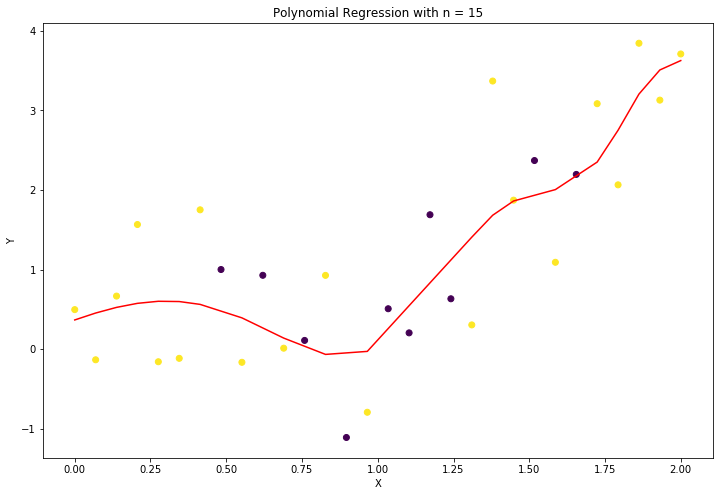

In [14]:
plot_polinomial_regression(X_train=X_train,
                           Y_train=y_train,
                           X_test=X_test,
                           Y_test=y_test,
                           n_degree=15,
                            lambda_=0.01)

## General regularization

In general we can add penalty $L_{q}$ norm of our bettas
$$ L_{q} = \sum_{i=1}^n(\beta_{i}^{q})^{\frac{1}{q}}$$
![title](../Images/l_q_norms.jpg)

In p = 1 case model called **Lasso regression**

In p = 2 case model called **Ridge regression**